# <b>A. <span style='color:#0B2F9F'><code>PREFIX</code></span></b>
Prefix merupakan penggunaan awalan pada nama tabel untuk memberikan informasi tambahan atau untuk mengelompokkan objek-objek tertentu. Sebagai contoh perhatikan gambar berikut : <br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/SQL%20-%20Prefix.png" width="50%">

<br><br>
Nama tabel dimisalkan (diberi alias) sebagai tbl, lalu untuk mengakses kolom pada tabel tersebut bisa diberi prefix tbl.kolom1 dan seterusnya

#### <i><b><span style='color:#55679C'>Quest</span> : Pada tabel customer_demography, ambil kolom customer_id, gender, age dan married namun gunakan alias 'cdm' pada nama tabel dan sematkan prefixnya saat mengakses kolom!</b></i>

In [ ]:
SELECT cdm.customer_id, cdm.gender, cdm.age, cdm.married
FROM telco_churn.customer_demography AS cdm

customer_id,gender,age,married
8779-QRDMV,Male,78,No
7495-OOKFY,Female,74,Yes
1658-BYGOY,Male,71,No
4598-XLKNJ,Female,78,Yes
4846-WHAFZ,Female,80,Yes
4412-YLTKF,Female,72,No
0390-DCFDQ,Female,76,Yes
3445-HXXGF,Male,66,Yes
2656-FMOKZ,Female,70,No
2070-FNEXE,Female,77,No


# <b>B. <span style='color:#0B2F9F'><code>JOIN</code></span></b>

Data biasanya disimpan di berbagai tabel atau sistem yang berbeda pada RDBMS (Relational Database Management System). JOIN memungkinkan pengguna untuk menggabungkan data dari berbagai sumber untuk mendapatkan gambaran yang lebih lengkap. Memahami query JOIN memungkinkan seorang pengguna untuk mengintegrasikan dan menganalisis data secara efektif, sehingga dapat meningkatkan kualitas analisis dan mendukung pengambilan keputusan berbasis data.

Operasi JOIN standar dapat dilakukan jika terdapat kunci pada tiap tabel yang saling terhubung. Operasi join dasar yang paling umum digunakan ada 4 yakni :
<ul>
    <li><b>LEFT JOIN</b></li>
    LEFT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kiri (tabel pertama) dan baris yang cocok dari tabel kanan (tabel kedua). Jika tidak ada kecocokan di tabel kanan, maka nilai-nilai untuk kolom dari tabel kanan akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/left-join-extra.gif" width="20%">
    <br><br>
    <li><b>RIGHT JOIN</b></li>
    RIGHT JOIN adalah jenis operasi penggabungan baris dari dua tabel, tetapi hanya mengembalikan semua baris dari tabel kanan (tabel kedua) dan baris yang cocok dari tabel kiri (tabel pertama). Jika tidak ada kecocokan di tabel kiri, maka nilai-nilai untuk kolom dari tabel kiri akan diisi dengan NULL.<br><br>
    <img src="https://thomasadventure.blog/img/right-join.gif" width="20%">
    <br><br>
    <li><b>INNER JOIN</b></li>
    INNER JOIN adalah jenis operasi penggabungan yang hanya mengembalikan baris yang memiliki kecocokan di kedua tabel berdasarkan kriteria tertentu.<br><br>
    <img src="https://thomasadventure.blog/img/inner-join.gif" width="20%">
    <br><br>
     <li><b>FULL JOIN</b></li>
    FULL JOIN adalah jenis operasi penggabungan semua baris dari kedua tabel, baik yang memiliki kecocokan maupun yang tidak. Dengan demikian, hasilnya akan mencakup semua data dari tabel kiri dan tabel kanan.<br><br>
    <img src="https://thomasadventure.blog/img/full-join.gif" width="20%">
    <br><br>
</ul>

#### <i><b><span style='color:#55679C'>Pre-Quest</span>
Untuk melakukan join biasanya akan lebih mudah jika arsitektur relasi antar tabel atau biasa dikenal ERD (Entity Relational Diagram) telah dibuat atau diketahui. Pada data telco churn ERD-nya disajikan pada gambar berikut<br><br>

<img src="https://raw.githubusercontent.com/bachtiyarma/Material/refs/heads/main/Image/Materi-SQL/ERD%20-%20Telco%20Churn.png" width="40%">

#### <i><b><span style='color:#55679C'>Quest : </span>Hitung berapa rata-rata biaya bulanan tiap status customer! Tampilkan status, total_customer, avg_monthly_charge! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
cs.status,
COUNT(cs.customer_id) AS total_customer,
ROUND(AVG(s.monthly_charge),2) AS average_monthly_charge
FROM `telco_churn.customer_status` AS cs
LEFT JOIN `telco_churn.services` AS s
ON cs.customer_id = s.customer_id
GROUP BY cs.status;

status,total_customer,avg_monthly_charge
Churned,1869,74.44
Joined,454,43.47
Stayed,4720,62.98


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Didapatkan bahwa customer yang masih berlangganan (*Stayed*) sebanyak 4.720 orang memiliki rata-rata pengeluaran biaya bulanan sebesar 62.98 USD, menyusul customer yang sudah *Churned* memiliki rata-rata pengeluaran biaya langganan paling besar sebesar 74.44 USD, sedangkan pada customer yang baru bergabung *Joined* memiliki rata-rata pengeluaran biaya langganan per bulan paling rendah yakni 43.47 USD.

Interpretasi lain, customer yang baru bergabung memiliki biaya yang lebih rendah dibandingkan customer yang sudah lama bergabung dan yang sudah tidak berlangganan. Dari segi harga, tampak adanya peningkatan harga jika sudah berlangganan lama, terlihat pada customer yang sudah "Churned" rata-rata biaya langganannya sangat besar mencapai 74.44 USD.

#### <i><b><span style='color:#55679C'>Quest : </span>Coba Sudut Pandang Lebih Luas; Hitung berapa banyak customer, rata-rata biaya bulanan & rata-rata umur tiap status customer, gender dan status pernikahannya! Tampilkan status, gender, married, total_customer, avg_monthly_charge! Urutkan hasilnya per metrik perhitungan dan Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
cs.status,
cd.gender,
cd.married,
COUNT(cs.customer_id) AS total_customer,
ROUND(AVG(s.monthly_charge),2) AS avg_monthly_charge
FROM `telco_churn.customer_status` AS cs
LEFT JOIN `telco_churn.customer_demography` AS cd ON cs.customer_id = cd.customer_id
LEFT JOIN `telco_churn.services` AS s ON cs.customer_id = s.customer_id
GROUP BY cs.status,cd.gender,cd.married
ORDER BY cs.status, cd.gender

status,gender,married,total_customer,avg_monthly_charge
Churned,Female,Yes,319,78.0
Churned,Female,No,620,73.17
Churned,Male,Yes,350,81.45
Churned,Male,No,580,69.61
Joined,Female,Yes,46,43.75
Joined,Female,No,165,43.47
Joined,Male,Yes,38,48.11
Joined,Male,No,205,42.55
Stayed,Female,Yes,1323,64.67
Stayed,Female,No,1015,61.51


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
1. Untuk customer Wanita lebih cenderung memiliki biaya berlangganan yang lebih besar.
2. Customer dengan status 'married' cenderung memiliki biaya berlangganan yang lebih besar.

Lanjutan: Mungkin untuk customer yang sudah berkeluarga berpotensi untuk diberikan promosi karena mereka berani untuk lebih besar membayar biaya langganan.

#### <i><b><span style='color:#55679C'>Quest : </span>Bagaimana dengan total tenure ? Hitung berapa rata-rata tenure_in_month tiap status customer! Tampilkan status, total_customer, avg_tenure_in_month! Interpretasikan insight dari hasil perhitungan!

In [ ]:
SELECT
cs.status,
COUNT(s.customer_id) AS total_customer,
ROUND(AVG(s.tenure_in_months),2) AS avg_tenure_in_month
FROM `telco_churn.services` AS s
LEFT JOIN `telco_churn.customer_status` AS cs ON s.customer_id = cs.customer_id
GROUP BY cs.status

status,total_customer,avg_tenure_in_month
Churned,1869,17.98
Joined,454,1.72
Stayed,4720,41.04


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Dari data terlihat bahwa rata-rata orang yang berhenti berlangganan berada pada bulan ke 18, sehingga perusahaan seharusnya lebih berhati-hati terhadap customer yang sudah mendekati 18 bulan. Mungkin bisa diberikan promo menarik agar customer bisa memilih untuk bertahan.

#### <i><b><span style='color:#55679C'>Quest : </span>Perusahaan telekomunikasi ingin melakukan perluasan market ke beberapa daerah yang mana di daerah tersebut belum ada pelanggan terdaftar dalam database. Buatkan daftar kode pos pada tabel population yang sama sekali belum ada orang yang menggunakan layanan telekomunikasi! Tampilkan kode pos dan jumlah populasinya!

In [ ]:
SELECT DISTINCT
l.zip_code AS zip_code_from_cust,
p.zip_code AS zip_code,
p.population AS jumlah_populasi,
l.customer_id AS total_customer
FROM telco_churn.customer_location AS l
RIGHT JOIN telco_churn.population AS p ON l.zip_code = p.zip_code
WHERE l.zip_code IS NULL
ORDER BY p.population DESC;

zip_code,population,total_customer
91402,66249,0
95023,47514,0
90020,42394,0
92307,31876,0
93555,29782,0
95531,23792,0
92277,17178,0
96161,15783,0
93640,9174,0
96064,4592,0


<b><span style='color:#FFDB00'><i>Interpretasi Hasil : </i></span></b><br>
Tertera daftar daerah-daerah dengan zip_code tertentu yang belum memiliki customer. Setelah diurutkan didapatkan bahwa daerah yang berpotensi menjadi lokasi pengembangan jaringan bagi perusahaan telekomunikasi berada di zip_code 91402. Kedepannya, mungkin harus di cek secara spasial lokasi-lokasi tersebut apakah memungkinkan dilakukan pengembangan atau tidak.

#### <i><b><span style='color:#55679C'>Quest 1 : </span> (From DQSquad)
Identifikasi daerah atau kota yang memiliki tingkat churn tertinggi! (Tiffany)

In [ ]:
SELECT
l.city,
cs.status,
COUNT(l.customer_id) AS total_customer
FROM telco_churn.customer_location AS l
LEFT JOIN telco_churn.customer_status AS cs ON l.customer_id = cs.customer_id
WHERE cs.status = "Churned"
GROUP BY cs.status,l.city
ORDER BY total_customer DESC

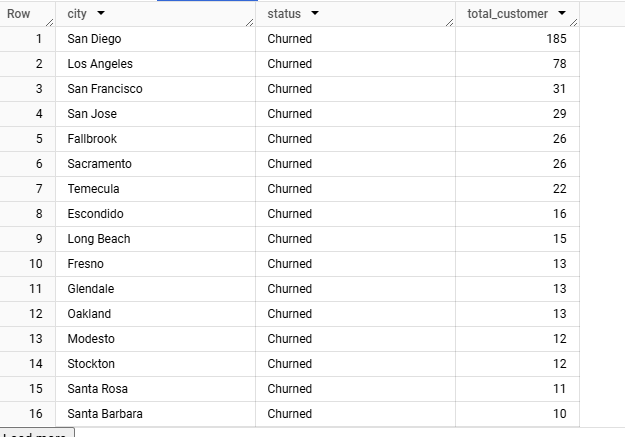

Interpretasi:
Terdapat mendapatkan informasi bahwa San Diego merupakan kota dengan tingkat "Churned" paling tinggi. Mungkin perlu dilakukan investigasi lebih lanjut mengenai alasan mayoritas "Churned" nya customer di kota tersebut.

#### <i><b><span style='color:#55679C'>Quest 2 : </span> (From DQSquad)
Identifikasi Umur customer berdasarkan biaya langganan yang diurutkan dari paling besar

In [ ]:
SELECT
cd.age,
COUNT(cd.customer_id) AS total_customer,
ROUND(AVG(s.monthly_charge),2) AS pengeluaran_bulanan
FROM telco_churn.customer_demography AS cd
LEFT JOIN telco_churn.services AS s ON cd.customer_id = s.customer_id
GROUP BY cd.age
ORDER BY pengeluaran_bulanan DESC

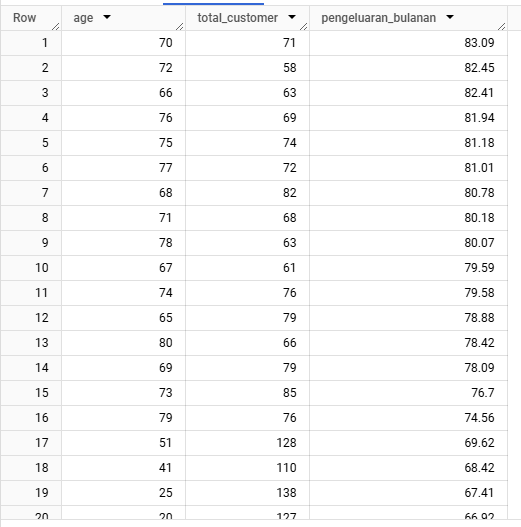

Interpretasi:
Terlihat bahwa customer dengan umur lebih tua cenderung mengeluarkan rata-rata biaya langganan bulanan yang lebih besar dibandingkan customer berumur lebih muda. Mungkin perusahaan bisa membuatkan promo lebih banyak kepada umur yang lebih tua, agar transisi customer dari muda ke tua dapat terus menyambung.


#### <i><b><span style='color:#55679C'>Quest 3 : </span> (From DQSquad)
Identifikasi customer lebih suka menggunakan pembayaran dengan metode apa dan berapa rata-rata total revenue nya pada masing-masing metode pembayaran

In [ ]:
SELECT
s.payment_method,
COUNT(s.customer_id) AS total_customer,
ROUND(AVG(s.total_revenue),2) AS avg_revenue
FROM telco_churn.services AS s
LEFT JOIN telco_churn.customer_demography as cd ON s.customer_id = cd.customer_id
GROUP BY s.payment_method
ORDER BY s.payment_method ASC, total_customer DESC

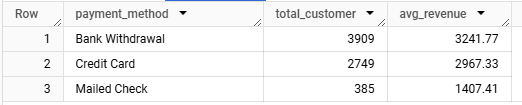

Interpretasi:
Penggunaan payment method dengan menggunakan Bank paling tinggi dibandingkan metode lainnya hal ini selaras dengan besar rata-rata revenue yang didapatkan dari masing-masing metode.
Hal menarik lainnya yang didapatkan adalah metode Mailed Check meskipun memiliki tingkat adopsi paling rendah, rata-rata revenue yang didapatkan mencapai 43% dari revenue rata-rata metode bank withdrawal.


---
Powered by : <br>
<img src="https://lh3.googleusercontent.com/ayfbbgvQolM_Ys9VYRVFD6FjDJXSebI9sN1VtY4ppp65dXepA6JCKgKMM_porWAErGQmc8l-L_RXq080SJ3FbYTIsyxYqWWTuAX8A3VtafWLUwAnnxNnjR1s-3BMCUlF34fYnViLuutxrLm3nEpoix0" width="20%">
<br><br>
<a href="https://www.linkedin.com/in/iqbalfauzanh/"><img src="https://img.shields.io/badge/-© 2025 Iqbal Fauzan Herlambang-417DAC?style=for-the-badge&logoColor=white"/></a>